# Packages and constants <a class="anchor" id="packages-constants"></a>

In [ ]:
# Install packages
!pip install tellurium -q

# Import packages
import tellurium as te # Python-based modeling environment for kinetic models


# Demo

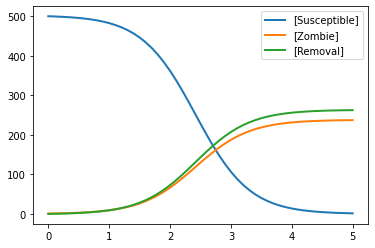

In [ ]:
r = te.loads("https://www.ebi.ac.uk/biomodels/model/download/BIOMD0000000882.7?filename=munz2000.xml")
r.simulate()
r.plot()


In [ ]:
print(r.getAntimony())

// Created by libAntimony v2.12.0
function Function_for_Removal_of_zombie_or_susceptible(beta, Susceptible, Zombie, delta)
  beta*Susceptible*Zombie + delta*Susceptible;
end

Function_for_Removal_of_zombie_or_susceptible is "Function for Removal of zombie or susceptible"

function Function_for_resurrection_to_Zombie(zeta, Removal)
  zeta*Removal;
end

Function_for_resurrection_to_Zombie is "Function for resurrection to Zombie"

function Function_for_Susceptible_to_Zombie_or_death(beta, Susceptible, Zombie, delta)
  beta*Susceptible*Zombie + delta*Susceptible;
end

Function_for_Susceptible_to_Zombie_or_death is "Function for Susceptible to Zombie or death"

function Function_for_Death_from_Zombie(alpha, Susceptible, Zombie)
  alpha*Susceptible*Zombie;
end

Function_for_Death_from_Zombie is "Function for Death from Zombie"

function Function_for_Zombification(beta, Susceptible, Zombie, zeta, Removal)
  beta*Susceptible*Zombie + zeta*Removal;
end

Function_for_Zombification is "Function f

In [ ]:
import libsbml

sbmldoc = libsbml.readSBMLFromString(r.getSBML())
props = libsbml.ConversionProperties()
props.addOption("expandFunctionDefinitions", True)
if sbmldoc.convert(props) != libsbml.LIBSBML_OPERATION_SUCCESS:
    print("[Error] Conversion failed...")
    sys.exit(1)

r = te.loads(libsbml.writeSBMLToString(sbmldoc))
print(r.getAntimony())
#writer.writeSBML(sbmldoc, outfile)

// Created by libAntimony v2.12.0
model *New_Model()

  // Compartments and Species:
  compartment compartment_;
  species Susceptible in compartment_, Zombie in compartment_, Removal in compartment_;

  // Reactions:
  Birth:  => Susceptible; compartment_*p;
  Zombification:  => Zombie; compartment_*(beta*Susceptible*Zombie + zeta*Removal);
  Susceptible_to_Zombie_or_death: Susceptible => ; compartment_*(beta*Susceptible*Zombie + delta*Susceptible);
  Removal_of_zombie_or_susceptible:  => Removal; compartment_*(alpha*Susceptible*Zombie + delta*Susceptible);
  Resurrection_to_Zombie: Removal => ; compartment_*zeta*Removal;
  Death_from_Zombie: Zombie => ; compartment_*alpha*Susceptible*Zombie;

  // Species initializations:
  Susceptible = 500;
  Zombie = 1;
  Removal = 0;

  // Compartment initializations:
  compartment_ = 1;

  // Variable initializations:
  alpha = 0.005;
  beta = 0.0095;
  delta = 0.0001;
  zeta = 0.0001;
  p = 0.05;

  // Other declarations:
  const compartment_, 

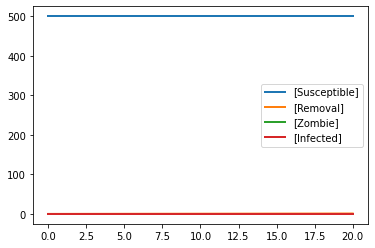

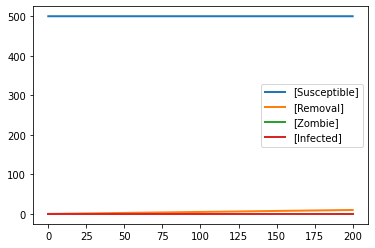

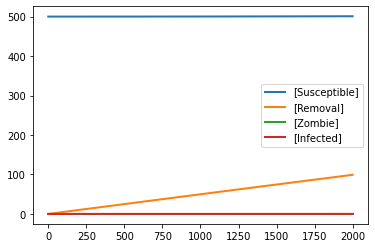

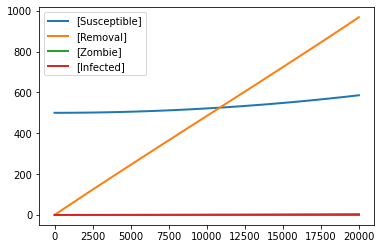

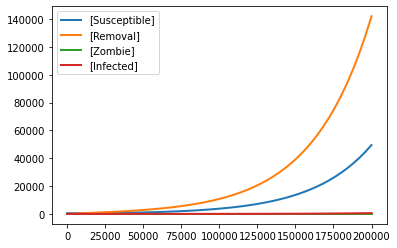

In [ ]:
r = te.loada("""
model *New_Model()

  // Reactions:
  Birth:  => Susceptible; Susceptible*p;
  Zombie_Resurrection_or_Death:  Removal => Zombie; zeta*Removal - alpha*Susceptible*Zombie - immolation*Zombie;

  Infection: Susceptible -> Infected;  beta*Susceptible*Zombie
  Zombification: Infected -> Zombie; rho*Infected
  Death:     Susceptible -> Removal; delta*Susceptible
  Infected_Death: Infected -> Removal; delta*Infected
  Cure: Zombie -> Susceptible; cure*Zombie*Susceptible

  // Species initializations:
  Susceptible = 500;
  Zombie = 0;
  Removal = 0;

  // Compartment initializations:
  compartment_ = 1;

  // Variable initializations:
  alpha = 0.005;
  beta = 0.0095;
  delta = 0.0001;
  zeta = 0.00001;
  p = 0.05/500;
  immolation = 0.0001
  rho = 0.0001
  cure = 0.1
end
""")
r.simulate(0, 20)
r.plot()

r.reset()
r.simulate(0, 200)
r.plot()

r.reset()
r.simulate(0, 2000)
r.plot()

r.reset()
r.simulate(0, 20000)
r.plot()


r.reset()
r.simulate(0, 200000)
r.plot()


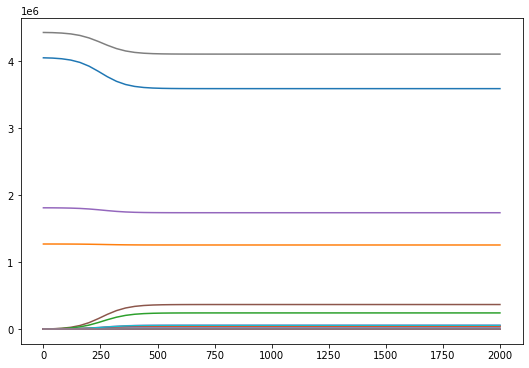

In [ ]:
import matplotlib.pyplot as plt


r = te.loads("https://www.ebi.ac.uk/biomodels/model/download/BIOMD0000000969.3?filename=Cuadros2020.xml")
results = r.simulate(0,2000)
te.plot(results[:,0], results[:,1:])


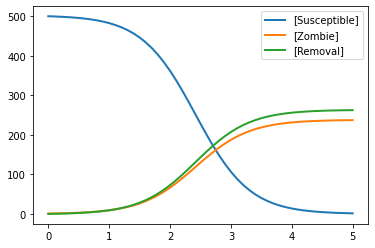

               Birth, Zombification, Susceptible_to_Zombie_or_death, Removal_of_zombie_or_susceptible, Resurrection_to_Zombie, Death_from_Zombie
Susceptible [[     1,             0,                             -1,                                0,                      0,                 0],
Zombie       [     0,             1,                              0,                                0,                      0,                -1],
Removal      [     0,             0,                              0,                                1,                     -1,                 0]]

In [ ]:

r = te.loads("https://www.ebi.ac.uk/biomodels/model/download/BIOMD0000000882.7?filename=munz2000.xml")
r.simulate()
r.plot()
r.getFullStoichiometryMatrix()